In [1]:
# Célula 1: Importações
import sys
import os
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, confusion_matrix, roc_curve, auc)

# Importando modelos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# Célula 2: Carregamento e preparação dos dados
# Carregando dados
dados = pd.read_csv('../data/processed/dados_preprocessados.csv', header=None)
X = dados.iloc[:, 1:]  # features
y = dados.iloc[:, 0]   # target

# Verificando distribuição das classes
print("Distribuição das classes:")
print(y.value_counts())

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Célula 3: Configuração dos modelos
MODEL_CONFIGS = {
    'Regressão Logística': {
        'modelo': LogisticRegression(random_state=42, max_iter=1000),
        'params_grid': {
            'C': [0.001, 0.01, 0.1, 1, 10]
        }
    },
    'KNN': {
        'modelo': KNeighborsClassifier(),
        'params_grid': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance']
        }
    },
    'Árvore de Decisão': {
        'modelo': DecisionTreeClassifier(random_state=42),
        'params_grid': {
            'max_depth': [3, 5, 7],
            'min_samples_split': [2, 5, 10]
        }
    },
    'Naive Bayes': {
        'modelo': GaussianNB(),
        'params_grid': {}
    }
}

# Célula 4: Treinamento e avaliação
resultados = {}

for nome, config in MODEL_CONFIGS.items():
    print(f"\nTreinando {nome}...")
    modelo = config['modelo']
    params = config['params_grid']
    
    # Treinamento com GridSearch
    if params:
        grid_search = GridSearchCV(modelo, params, cv=5, scoring='f1')
        grid_search.fit(X_train, y_train)
        modelo = grid_search.best_estimator_
    else:
        modelo.fit(X_train, y_train)
    
    # Previsões
    y_pred = modelo.predict(X_test)
    
    # Métricas
    resultados[nome] = {
        'acuracia': accuracy_score(y_test, y_pred),
        'precisao': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'matriz_confusao': confusion_matrix(y_test, y_pred)
    }
    
    # Curva ROC (se o modelo suportar predict_proba)
    if hasattr(modelo, "predict_proba"):
        y_prob = modelo.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        resultados[nome]['auc'] = auc(fpr, tpr)
        resultados[nome]['fpr'] = fpr
        resultados[nome]['tpr'] = tpr

# Célula 5: Visualização dos resultados
for nome, metricas in resultados.items():
    print(f"\n{'='*50}")
    print(f"Resultados para {nome}")
    print(f"{'='*50}")
    
    print(f"Acurácia: {metricas['acuracia']:.3f}")
    print(f"Precisão: {metricas['precisao']:.3f}")
    print(f"Recall: {metricas['recall']:.3f}")
    print(f"F1-Score: {metricas['f1']:.3f}")
    if 'auc' in metricas:
        print(f"AUC-ROC: {metricas['auc']:.3f}")
    
    # Matriz de Confusão
    plt.figure(figsize=(8,6))
    sns.heatmap(metricas['matriz_confusao'], 
                annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusão - {nome}')
    plt.ylabel('Real')
    plt.xlabel('Previsto')
    plt.show()
    
    # Curva ROC
    if 'auc' in metricas:
        plt.figure(figsize=(8,6))
        plt.plot(metricas['fpr'], metricas['tpr'], 
                label=f'ROC curve (AUC = {metricas["auc"]:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('Taxa de Falsos Positivos')
        plt.ylabel('Taxa de Verdadeiros Positivos')
        plt.title(f'Curva ROC - {nome}')
        plt.legend()
        plt.show()

# Célula 6: Salvando resultados
df_resultados = pd.DataFrame({
    nome: {
        'Acurácia': res['acuracia'],
        'Precisão': res['precisao'],
        'Recall': res['recall'],
        'F1-Score': res['f1'],
        'AUC-ROC': res.get('auc', np.nan)
    }
    for nome, res in resultados.items()
}).T

# Salvando resultados
df_resultados.to_csv('../data/processed/resultados_classificacao.csv')

# Visualização comparativa
plt.figure(figsize=(12,6))
df_resultados.plot(kind='bar')
plt.title('Comparação de Métricas entre Modelos')
plt.xlabel('Modelo')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

Distribuição das classes:
0
0            6599
1             220
Bankrupt?       1
Name: count, dtype: int64

Treinando Regressão Logística...


C:\Users\migue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\migue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\migue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\migue\AppData\Local\Pa

ValueError: could not convert string to float: ' ROA(C) before interest and depreciation before interest'

Distribuição das classes:
0    6599
1     220
Name: count, dtype: int64

Treinando Regressão Logística...

Treinando Árvore de Decisão...

Treinando Naive Bayes...

Resultados para Regressão Logística
Acurácia: 0.963
Precisão: 0.364
Recall: 0.182
F1-Score: 0.242


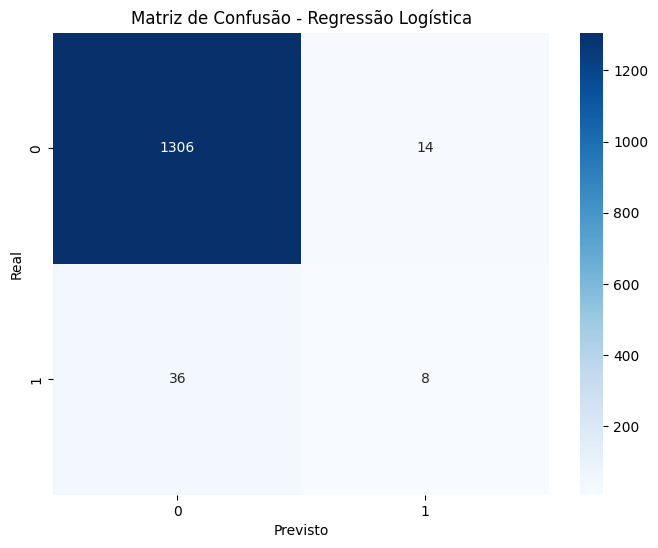


Resultados para Árvore de Decisão
Acurácia: 0.966
Precisão: 0.472
Recall: 0.386
F1-Score: 0.425


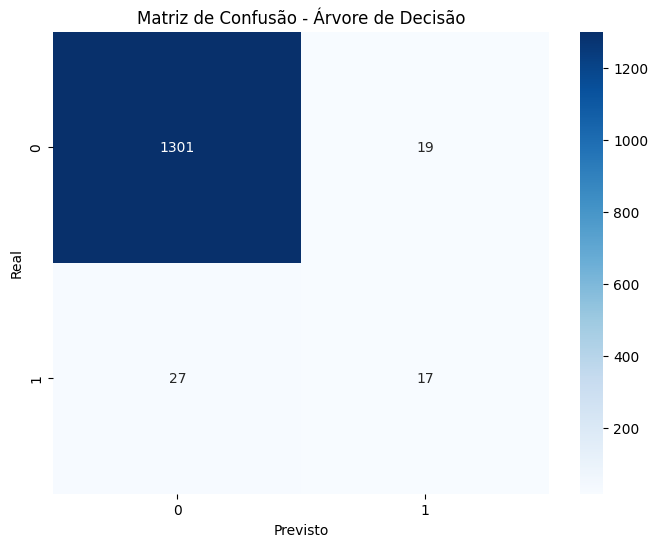


Resultados para Naive Bayes
Acurácia: 0.304
Precisão: 0.039
Recall: 0.864
F1-Score: 0.074


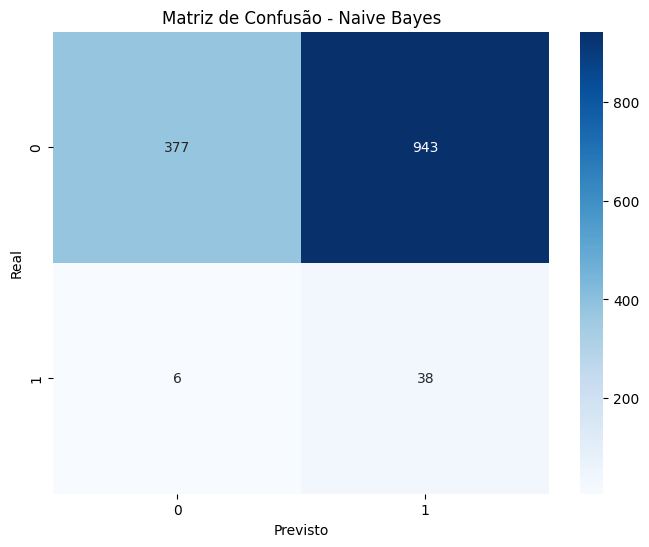

In [2]:
# Célula 1: Importações
import sys
import os
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, confusion_matrix, roc_curve, auc)

# Célula 2: Carregamento e pré-processamento dos dados
# Carregando dados
dados = pd.read_csv('../data/processed/dados_preprocessados.csv')

# Convertendo rótulos para numérico
le = LabelEncoder()
y = le.fit_transform(dados.iloc[:, 0])
X = dados.iloc[:, 1:].astype(float)  # Convertendo features para float

print("Distribuição das classes:")
print(pd.Series(y).value_counts())

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Célula 3: Configuração dos modelos simplificada
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

MODEL_CONFIGS = {
    'Regressão Logística': {
        'modelo': LogisticRegression(max_iter=1000, random_state=42),
        'params': {
            'C': [0.1, 1, 10]
        }
    },
    'Árvore de Decisão': {
        'modelo': DecisionTreeClassifier(random_state=42),
        'params': {
            'max_depth': [3, 5, 7],
            'min_samples_split': [2, 5]
        }
    },
    'Naive Bayes': {
        'modelo': GaussianNB(),
        'params': {}
    }
}

# Célula 4: Treinamento e avaliação
resultados = {}

for nome, config in MODEL_CONFIGS.items():
    print(f"\nTreinando {nome}...")
    modelo = config['modelo']
    params = config['params']
    
    if params:
        grid_search = GridSearchCV(
            modelo, 
            params, 
            cv=5, 
            scoring='f1',
            n_jobs=-1
        )
        grid_search.fit(X_train, y_train)
        modelo = grid_search.best_estimator_
    else:
        modelo.fit(X_train, y_train)
    
    # Avaliação
    y_pred = modelo.predict(X_test)
    resultados[nome] = {
        'modelo': modelo,
        'acuracia': accuracy_score(y_test, y_pred),
        'precisao': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'matriz_confusao': confusion_matrix(y_test, y_pred)
    }

# Célula 5: Visualização dos resultados
for nome, res in resultados.items():
    print(f"\n{'='*50}")
    print(f"Resultados para {nome}")
    print(f"{'='*50}")
    
    print(f"Acurácia: {res['acuracia']:.3f}")
    print(f"Precisão: {res['precisao']:.3f}")
    print(f"Recall: {res['recall']:.3f}")
    print(f"F1-Score: {res['f1']:.3f}")
    
    plt.figure(figsize=(8,6))
    sns.heatmap(res['matriz_confusao'], 
                annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusão - {nome}')
    plt.ylabel('Real')
    plt.xlabel('Previsto')
    plt.show()